# Applied Data Science 1 Tutorial 7.1

# Clustering

Clustering is all about finding subsets of data which behave in the same way.
That means groups acting **similar** to other members in that group *and* **dissimilar** to other groups.


# Question
Download the `fish_measurements` dataset and determine: a) some suitable sub-set of data to be clustered, b) an appropriate number of clusters and c) plot these clusters.
Don't forget the pre-processing steps required, including ensuring the data is numeric and scaled logically.

share your notebook to kimsiong.wong@robotics.com.sg

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_fish = pd.read_csv('./data/fish_measurements.csv')
# print(f"Original datasta: {df_fish.head()}")

df_cleaned = df_fish.drop(0).copy()
df_cleaned.reset_index(drop=True, inplace=True)
numeric_cols = ['weight', 'lower jaw fork length',
                'fork length', 'total length', 'height', 'width']

df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(
     pd.to_numeric, errors='coerce')

df_cleaned = df_cleaned.dropna()

#Quation A:
print(f"We use only the numeric data columns for the subset which are the following: { df_cleaned.columns }")

X = df_cleaned[numeric_cols]

# Question B: an appropriate number of clusters
#1. Determine Optimal Number of Clusters ( elbow method )
inertia = []
K_range = range(1, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)


We use only the numeric data columns for the subset which are the following: Index(['species', 'weight', 'lower jaw fork length', 'fork length',
       'total length', 'height', 'width'],
      dtype='object')


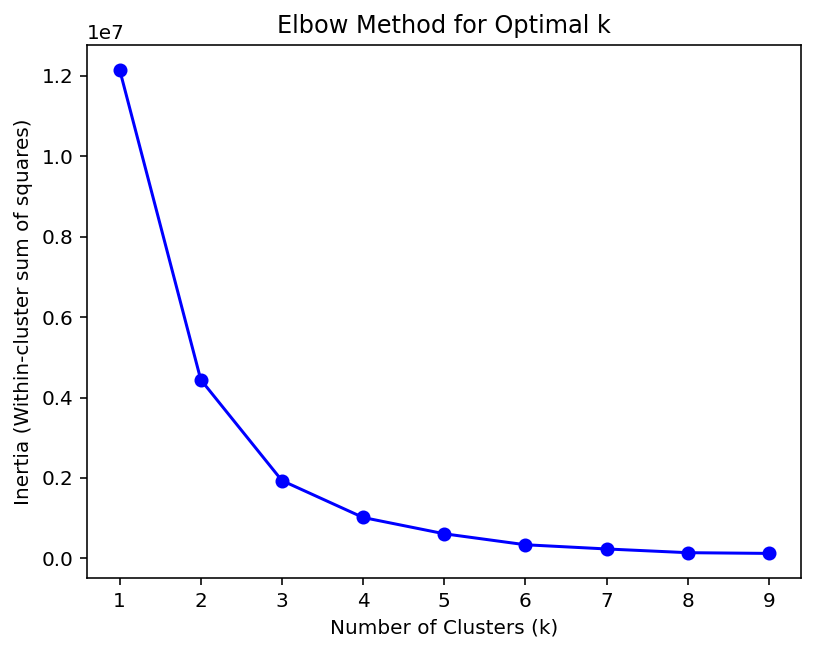

In [5]:
fig, ax = plt.subplots(dpi=144)
ax.plot(K_range, inertia, 'bo-')

ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Inertia (Within-cluster sum of squares)")
ax.set_title("Elbow Method for Optimal k")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Preprocessing for Clustering
df_cut = df_cleaned[numeric_cols].copy()

# Question C: plot these clusters
# Based on the graph, we can say that the optimal k = 3 however, we need to consider the silhouette score which k = 5 gives the best silhouette score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_cleaned['clusters'] = clusters

silhouettescore = silhouette_score(X_scaled, clusters)
print(f"Silhouette Scores: {silhouettescore}")
# Plot the fitted clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Silhouette Scores: 0.600222185315054


In [27]:
def plot_silhouette_scores():
    sample_silhouette_values = silhouette_samples(X, clusters)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for spacing between clusters

    ax.set_title("Silhouette plot for each cluster")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Draw vertical line for average silhouette score
    ax.axvline(x=silhouettescore, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    plt.show()

In [28]:
def plot_fitted_fish():
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:, 1],
        hue=clusters,
        palette='Set2',
        s=80
    )

    plt.title('Fish Measurement Clustering (PCA 2D Projection)')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()
    return

In [29]:
def plot_fitted_fish_pair():
    plt.figure(figsize=(8,6))
    sns.pairplot(df_cleaned, vars=numeric_cols,
                 hue='clusters', palette='Set2', corner=True)
    plt.show()
    return

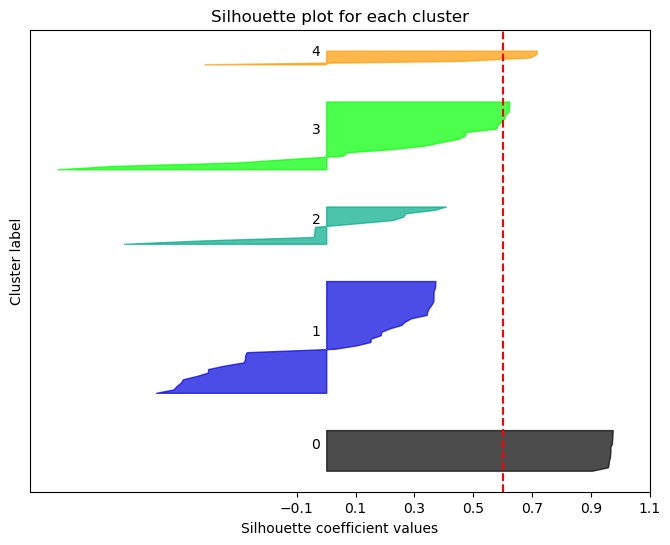

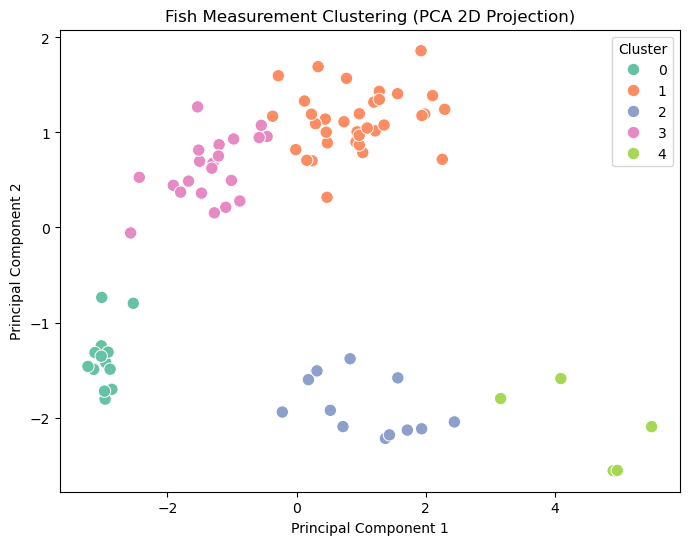

<Figure size 800x600 with 0 Axes>

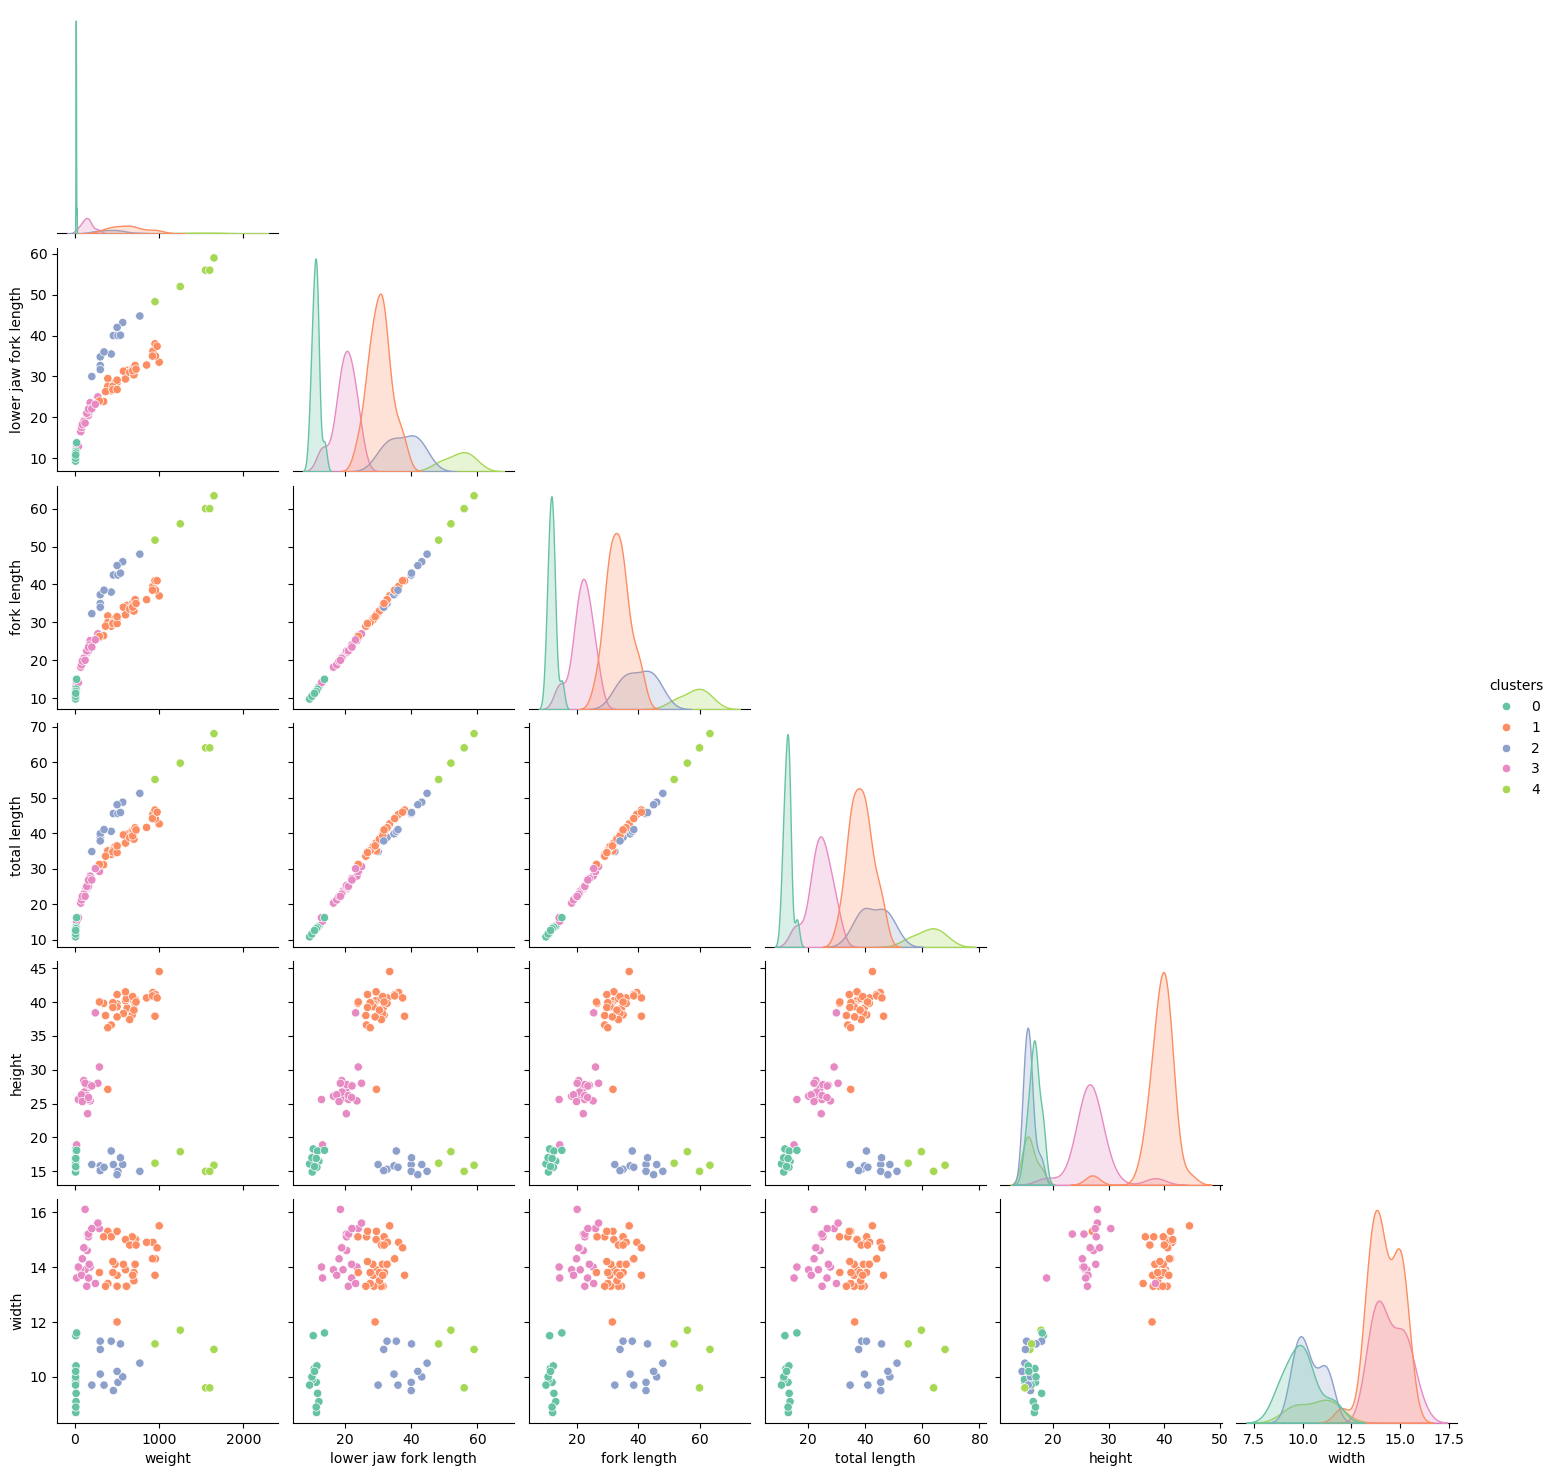

In [30]:
plot_silhouette_scores()
plot_fitted_fish()
plot_fitted_fish_pair()

## End Exercise 1